In this notebook, we will analyze a database of an airline. Our study begins by loading the necessary libraries to work, which are: numpy, pandas, and matplotlib. To enhance our visualizations, we will use the "ggplot" style.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('ggplot')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/airline-dataset/Airline Dataset Updated.csv
/kaggle/input/airline-dataset/Airline Dataset Updated - v2.csv
/kaggle/input/airline-dataset/Airline Dataset.csv


# **Data loading and cleaning**

We are going to load the database into our dataframe "df" using the "pd.read_csv" tool. Next, we will use the "head" command to visualize the study's data.

In [2]:
df = pd.read_csv('/kaggle/input/airline-dataset/Airline Dataset.csv')

df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,10856,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,43872,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,42633,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,78493,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,82072,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


In [3]:
df.shape

(98619, 15)

Using "shape," we can see that our dataframe consists of 98,619 rows and 15 columns.

Next, we will explore the composition of our dataframe to identify any anomalies that could affect our study. By using "info," we can observe the dataframe's columns, null values, and data types. It's worth noting from this result that there are no null values, and the "Departure Date" column has an incorrect data type, which needs to be corrected.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  int64 
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(2), object(13)
memory usage

In [5]:
df["Departure Date"] = pd.to_datetime(df["Departure Date"])
df = df.sort_values(by = "Departure Date",ascending = True).reset_index(drop=True)

df

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,19773,Renee,Stollenbecker,Female,9,El Salvador,Dolpa Airport,NP,Nepal,AS,Asia,2022-01-01,DOP,Renee Stollenbecker,On Time
1,43924,Ashleigh,Fewell,Female,7,China,Sidi Bel Abbes Airport,DZ,Algeria,AF,Africa,2022-01-01,BFW,Ashleigh Fewell,Cancelled
2,67762,Barb,McCulloch,Female,90,Indonesia,Presidente Castro Pinto International Airport,BR,Brazil,SAM,South America,2022-01-01,JPA,Barb McCulloch,On Time
3,88170,Fabiano,Coners,Male,53,Philippines,Trail Airport,CA,Canada,NAM,North America,2022-01-01,YZZ,Fabiano Coners,Delayed
4,56545,Sky,Rushforth,Male,22,China,Puerto Deseado Airport,AR,Argentina,SAM,South America,2022-01-01,PUD,Sky Rushforth,On Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98614,92264,Jennifer,Pepon,Female,87,Pakistan,Nanjing Lukou Airport,CN,China,AS,Asia,2022-12-30,NKG,Jennifer Pepon,Delayed
98615,62543,Elianora,Mynett,Female,14,Brazil,Holingol Huolinhe Airport,CN,China,AS,Asia,2022-12-30,HUO,Elianora Mynett,Cancelled
98616,39325,Blair,Yglesias,Female,47,Brazil,Gwaunaru'u Airport,SB,Solomon Islands,OC,Oceania,2022-12-30,AKS,Blair Yglesias,Delayed
98617,69451,Laurence,Gouldstraw,Male,53,Thailand,Elenak Airport,MH,Marshall Islands,OC,Oceania,2022-12-30,EAL,Laurence Gouldstraw,Delayed


To change the data type of the "Departure Date" variable to the desired format, we will use the "pd.to_datetime" command, which will return that column with the appropriate "date" type. Next, to organize the information based on the date of the first record, we will apply the "sort_values" command to our dataframe based on "Departure Date," sorting it in ascending order. Finally, by using "reset_index," we will reorder the indices based on the date.

In [6]:
print(df.info(), "\n")

print("Nº duplicated:",df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Passenger ID          98619 non-null  int64         
 1   First Name            98619 non-null  object        
 2   Last Name             98619 non-null  object        
 3   Gender                98619 non-null  object        
 4   Age                   98619 non-null  int64         
 5   Nationality           98619 non-null  object        
 6   Airport Name          98619 non-null  object        
 7   Airport Country Code  98619 non-null  object        
 8   Country Name          98619 non-null  object        
 9   Airport Continent     98619 non-null  object        
 10  Continents            98619 non-null  object        
 11  Departure Date        98619 non-null  datetime64[ns]
 12  Arrival Airport       98619 non-null  object        
 13  Pilot Name      

Now we can see that the "Departure Date" column is in the correct type, and finally, we observe that the data for this analysis is not duplicated. We deduce this by using the "duplicated" variable.

# **Analysis and Visualization.**

To develop this section, we consider the following questions:

* Percentage of men and women.
* Ages of the passengers.
* Flight statuses.
* Which are the top 5 countries with the most visits?
* Which continent is the most visited?
* Top 10 nationalities.
* What is the flight status throughout the year?

# Percentage of men and women

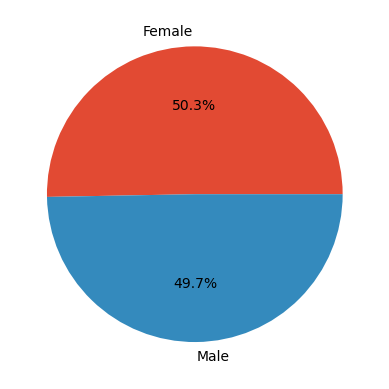

In [7]:
values= df["Gender"].value_counts()
labels= df["Gender"].unique()

fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct = '%1.1f%%')

plt.show()

To obtain our pie chart, we first defined two dataframes: "values" and "labels." The first one records the quantity of genders, and the second one represents the categories, which are male and female. We define our arguments to build our chart, and by using "plt.show," we visualize the results.

We can see that the percentage of men and women is close to balance, with a slight majority of women.

# Ages of the passengers.

In [8]:
df["Age"].describe()

count    98619.000000
mean        45.504021
std         25.929849
min          1.000000
25%         23.000000
50%         46.000000
75%         68.000000
max         90.000000
Name: Age, dtype: float64

Through "describe," we obtain a series of descriptive statistics where we can observe, for example, that the average age of the passengers is 45 years, with a minimum age of 1 year and a maximum of 90 years.

To clarify which age stands out the most in this dataset, we will group these ages and visualize them.

In [9]:
bins = [0, 12, 30, 50, 100] 

labels = ['Children', 'Youth', 'Adults', 'Seniors'] 

df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

We define the ages in a series of intervals and record them in "bins," adding a category for each corresponding age range, which is stored in "labels." Next, we define a new column for our dataframe called "Age Group," where we will group the ages from our "Age" column based on the defined age intervals ("bins") and assign them to the appropriate category ("labels") using "pd.cut."

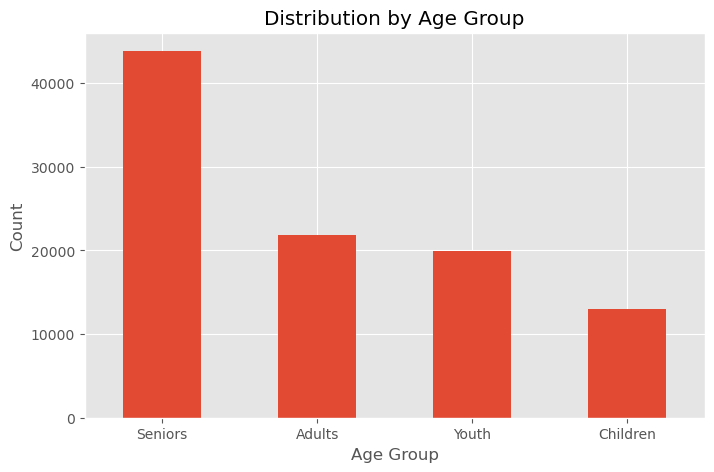

In [10]:
group_counts = df['Age Group'].value_counts()

plt.figure(figsize=(8, 5))
group_counts.plot(kind='bar', rot=0)
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Distribution by Age Group")
plt.show()

In "group_counts," we define the values corresponding to each group in this column. Next, we use "plot" to define our graph, specifying in "kind" that we want a bar chart. We also define the labels on the "x" and "y" axes and set the title. Finally, we use "plt.show" to visualize our results.

We can see that the "Seniors" group has a significant presence in this dataframe, indicating that the majority of people in this database are between 50 and 100 years old.

# Flight statuses

In [11]:
df['Flight Status'].value_counts()

Cancelled    32942
On Time      32846
Delayed      32831
Name: Flight Status, dtype: int64

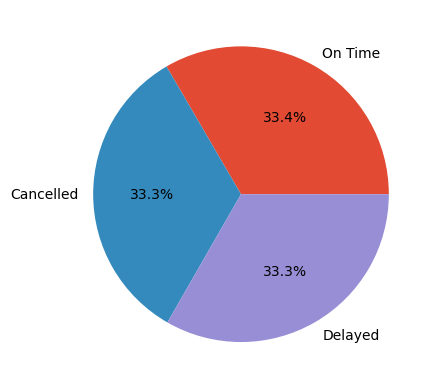

In [12]:
labels = df['Flight Status'].unique()
values = df['Flight Status'].value_counts()

fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct = '%1.1f%%')
plt.show()

For visualizing the flight statuses, we created a pie chart, following the same steps as in the first section, but this time working with the "Flight Status" column. From the results obtained, we can see that the flight statuses: "Cancelled, Delayed, On time," follow a similar distribution, with one flight status not significantly standing out compared to the others.

# Which are the top 5 countries with the most visits?

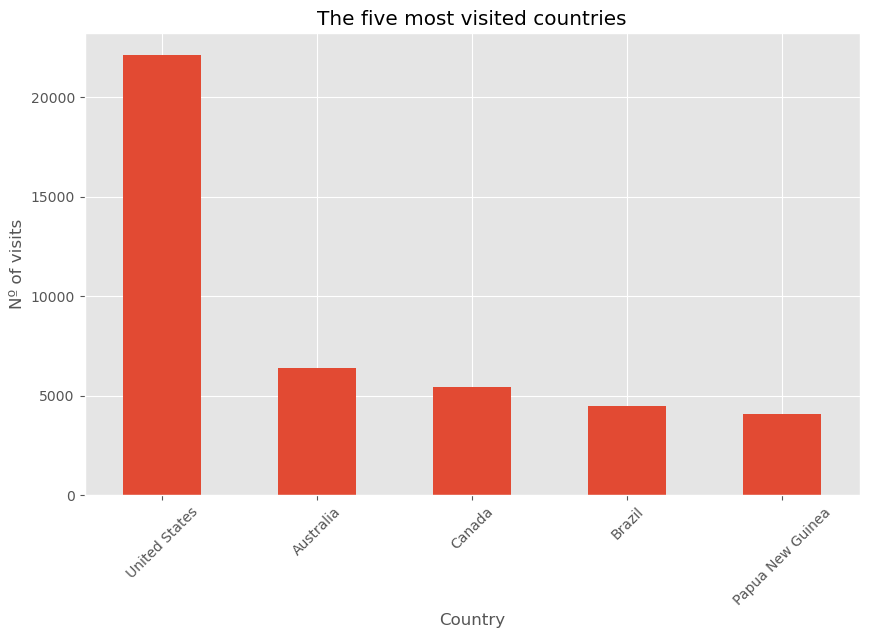

In [13]:
country_visits = df["Country Name"].value_counts().head(5)

plt.figure(figsize=(10, 6))
country_visits.plot(kind='bar')
plt.title('The five most visited countries')
plt.xlabel('Country')
plt.ylabel('Nº of visits')
plt.xticks(rotation=45) 
plt.show()

To obtain this result, we applied the "value_counts" command to the "Country Name" column, which returns the count for each country in this dataframe. By using "head(5)," we summarized the results to the top five values, sorted from highest to lowest. We included the corresponding code to visualize the results, and we can see that the United States is the country that stands out the most in terms of visits, making it the most visited country.

# Which continent is the most visited?

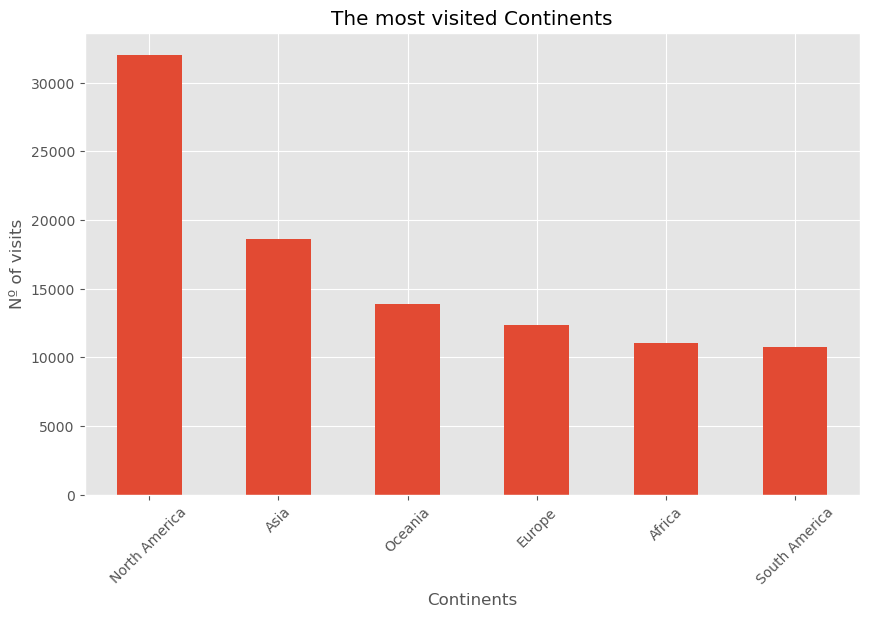

In [14]:
continents_visits = df["Continents"].value_counts()

plt.figure(figsize=(10, 6))
continents_visits.plot(kind='bar')
plt.title('The most visited Continents')
plt.xlabel('Continents')
plt.ylabel('Nº of visits')
plt.xticks(rotation=45)  
plt.show()

To visualize which continent has the most visits, we followed the same steps as in previous cases, but this time, we worked with the "Continents" column. The results show that North America is the most visited continent, and as we observed earlier, within this region, the United States has the highest number of visits.

# Top 10 nationalities.

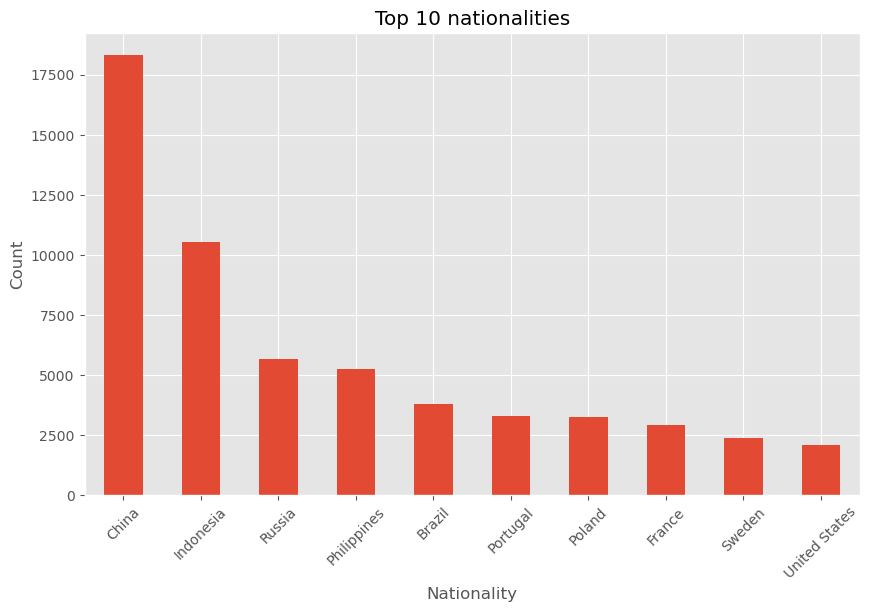

In [15]:
nationality = df["Nationality"].value_counts().head(10)

plt.figure(figsize=(10,6))
nationality.plot(kind="bar")
plt.title("Top 10 nationalities")
plt.xlabel("Nationality")
plt.ylabel("Count")
plt.xticks(rotation=45) 
plt.show()

From the results obtained for the top 10 nationalities, we can see that two countries, China and Indonesia, stand out compared to the others with values exceeding 10,000 records. Therefore, we can deduce that in this database, the majority of the records come from the Asian continent, especially from these two countries.

# What is the flight status throughout the year?

In this section, we will study the flight statuses throughout each month and quarterly. To do this, we will create a column for each of these requirements, using the "dt.month" and "dt.quarter" commands to obtain the values for the months and quarters, respectively.

In [16]:
df["month"] = df["Departure Date"].dt.month


In [17]:
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status,Age Group,month
0,19773,Renee,Stollenbecker,Female,9,El Salvador,Dolpa Airport,NP,Nepal,AS,Asia,2022-01-01,DOP,Renee Stollenbecker,On Time,Children,1
1,43924,Ashleigh,Fewell,Female,7,China,Sidi Bel Abbes Airport,DZ,Algeria,AF,Africa,2022-01-01,BFW,Ashleigh Fewell,Cancelled,Children,1
2,67762,Barb,McCulloch,Female,90,Indonesia,Presidente Castro Pinto International Airport,BR,Brazil,SAM,South America,2022-01-01,JPA,Barb McCulloch,On Time,Seniors,1
3,88170,Fabiano,Coners,Male,53,Philippines,Trail Airport,CA,Canada,NAM,North America,2022-01-01,YZZ,Fabiano Coners,Delayed,Seniors,1
4,56545,Sky,Rushforth,Male,22,China,Puerto Deseado Airport,AR,Argentina,SAM,South America,2022-01-01,PUD,Sky Rushforth,On Time,Youth,1


Here we can see the new "month" column that records the months in this dataframe.

For visualizing our results, a more detailed process has been carried out within the code, step by step, as referenced earlier.

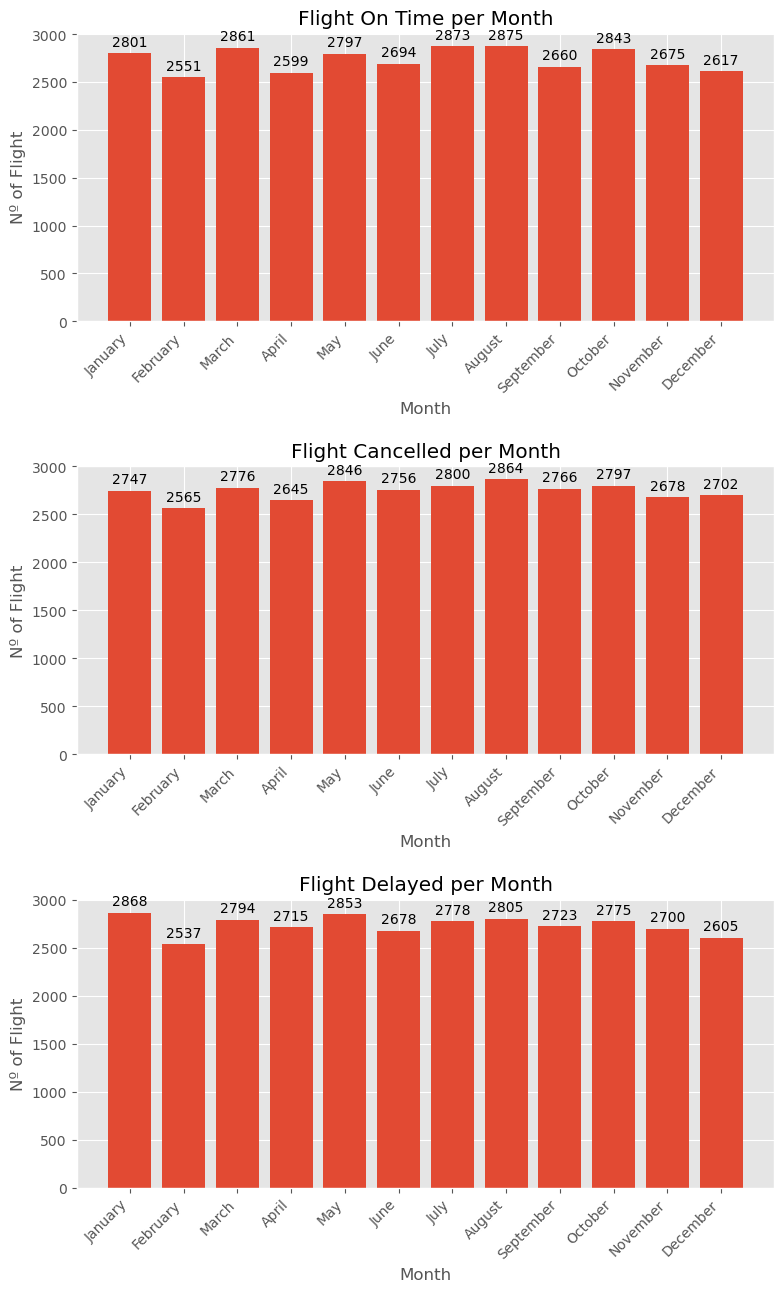

In [18]:
# Create a list
status_unique = df['Flight Status'].unique()

# Subplots
num_rows = len(status_unique)
fig, axs = plt.subplots(num_rows, 1, figsize=(9, 5 * num_rows), sharex=False,gridspec_kw={'hspace': 0.5})

# Labels
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# To iterate through the status and create separate graphs
for i, status in enumerate(status_unique):
    f_status = df[df['Flight Status'] == status]
    f_month = f_status.groupby(f_status['month'])['Flight Status'].count()
    
    bars = axs[i].bar(f_month.index, f_month.values)
    axs[i].set_title(f'Flight {status} per Month')
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Nº of Flight')
    
    # To set up X-axis labels to display the months.
    axs[i].set_xticks(range(1, 13))  # Set label positions
    axs[i].set_xticklabels(labels, rotation=45, ha='right')  # Set labels and rotation
    
    # Add value labels to the bars.
    for bar in bars:
        height = bar.get_height()
        axs[i].annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.show()

The three bar charts obtained allow us to visualize the three flight statuses that make up the "Flight Status" column together. Through these charts, we can see that over the course of each month, no flight statuses significantly stands out compared to the others; they are distributed relatively evenly. It's worth noting that February is the month with the fewest flights compared to the others, suggesting that it might be a low season for flights.

Next, we will repeat the previous process, but this time focusing on the analysis by quarters. We define our "quarter" column and visualize its values in our dataframe.

In [19]:
df["quarter"] = df["Departure Date"].dt.quarter

In [20]:
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status,Age Group,month,quarter
0,19773,Renee,Stollenbecker,Female,9,El Salvador,Dolpa Airport,NP,Nepal,AS,Asia,2022-01-01,DOP,Renee Stollenbecker,On Time,Children,1,1
1,43924,Ashleigh,Fewell,Female,7,China,Sidi Bel Abbes Airport,DZ,Algeria,AF,Africa,2022-01-01,BFW,Ashleigh Fewell,Cancelled,Children,1,1
2,67762,Barb,McCulloch,Female,90,Indonesia,Presidente Castro Pinto International Airport,BR,Brazil,SAM,South America,2022-01-01,JPA,Barb McCulloch,On Time,Seniors,1,1
3,88170,Fabiano,Coners,Male,53,Philippines,Trail Airport,CA,Canada,NAM,North America,2022-01-01,YZZ,Fabiano Coners,Delayed,Seniors,1,1
4,56545,Sky,Rushforth,Male,22,China,Puerto Deseado Airport,AR,Argentina,SAM,South America,2022-01-01,PUD,Sky Rushforth,On Time,Youth,1,1


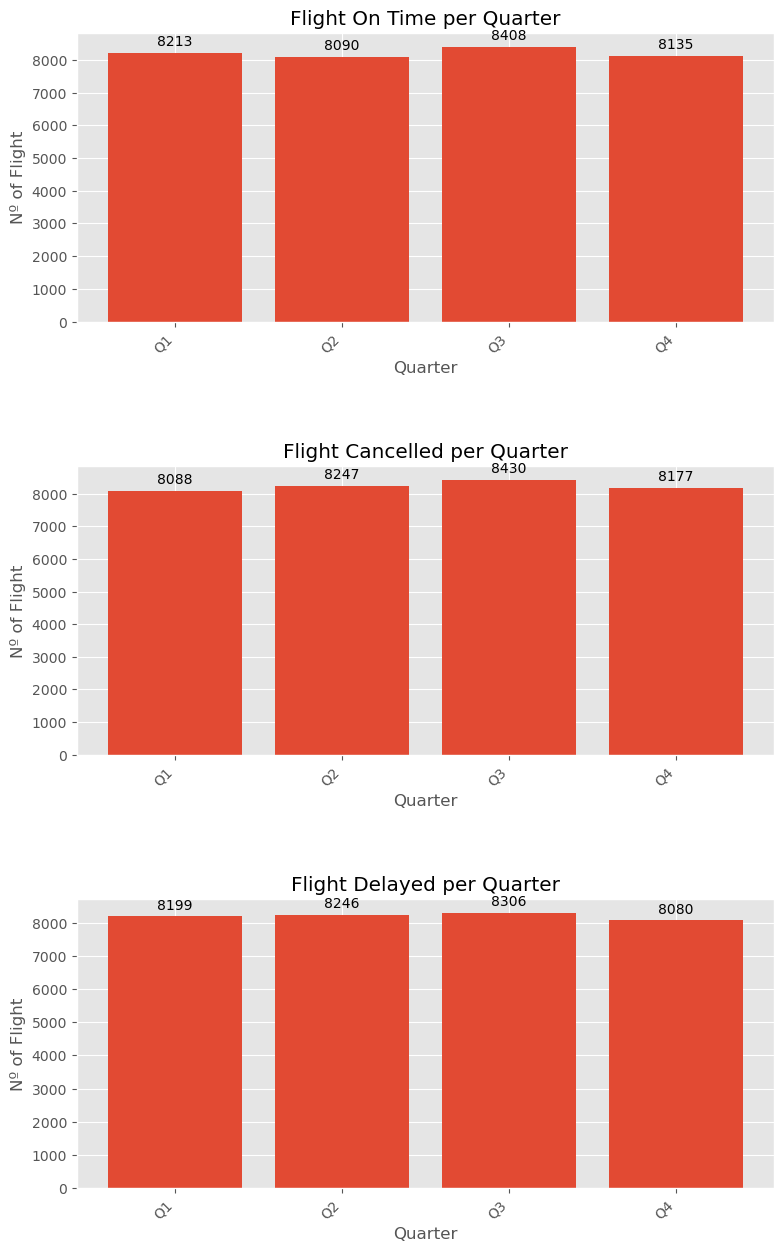

In [21]:
# Create a list
status_unique = df['Flight Status'].unique()

# Subplots
num_rows = len(status_unique)
fig, axs = plt.subplots(num_rows, 1, figsize=(9, 5 * num_rows), sharex=False, gridspec_kw={'hspace': 0.5})

# Labels
labels = ['Q1', 'Q2', 'Q3', 'Q4']

# To iterate through the status and create separate graphs
for i, status in enumerate(status_unique):
    f_status = df[df['Flight Status'] == status]
    f_quarter = f_status.groupby(f_status['quarter'])['Flight Status'].count()
    
    bars = axs[i].bar(f_quarter.index, f_quarter.values)
    axs[i].set_title(f'Flight {status} per Quarter')
    axs[i].set_xlabel('Quarter')
    axs[i].set_ylabel('Nº of Flight')
    
    # To set up X-axis labels to display the months.
    axs[i].set_xticks(range(1, 5))  # Set label positions
    axs[i].set_xticklabels(labels, rotation=45, ha='right')  # Set labels and rotation
    
    # Add value labels to the bars.
    for bar in bars:
        height = bar.get_height()
        axs[i].annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.show()

Based on the results obtained, we can see that there is no flight status that stands out more than the others within their respective quarters. However, when comparing the three types of flight statuses, we can observe that the third quarter has had the most "On time," "Delayed," and "Cancelled" flights. This could be because the third quarter encompasses the summer months when more trips are typically taken due to vacations. We also note the first quarter, as it has the most "On Time" flights and the fewest "Cancelled" flights among the quarters.